   # ARID1A: Effects of Mutation on ARID1A

<b>Standard imports for playing with and plotting data frames.</b>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import CPTAC data</b>

In [2]:
!pip install ../../../CPTAC/.


Processing /Users/emilyhosk/Documents/GitHub/CPTAC
  Running setup.py bdist_wheel for CPTAC ... done
  Stored in directory: /private/var/folders/ff/2brl56x130g54j111wjn1dr80000gn/T/pip-ephem-wheel-cache-6juyqq24/wheels/74/ec/47/b33f7d537422cb082fdd359e6c581bf078d7764dda10ee21d1
Successfully built CPTAC
  Found existing installation: CPTAC 0.1.3
    Uninstalling CPTAC-0.1.3:
      Successfully uninstalled CPTAC-0.1.3


In [3]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [4]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

## ARID1A protein abundance with ARID1A mutation

### Set gene and protein(s) of interest--in this case we are only looking at ARID1A--and then create the "cross" dataframe, which contains all the information we need for plotting this gene

In [5]:
gene = "ARID1A"
protList = ["ARID1A"]
cross = CPTAC.compare_mutations(proteomics, gene)
cross = cross[["Mutation", protList[0]]].dropna(axis=0)

### Perform a t-test with mutated and non-mutated protein levels

In [6]:
for protein in protList:
    mutated = cross.loc[cross["Mutation"] != "Wildtype"]
    wt = cross.loc[cross["Mutation"] == "Wildtype"]
    ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
    print("Test for " + protein + ": ")
    print(ttest)

Test for ARID1A: 
Ttest_indResult(statistic=-8.828828518504993, pvalue=2.4714832349368535e-15)


### We can now plot the data and see that ARID1A has a significantly higher abundance when it is mutated (missense mutations specifically)

ValueError: min() arg is an empty sequence

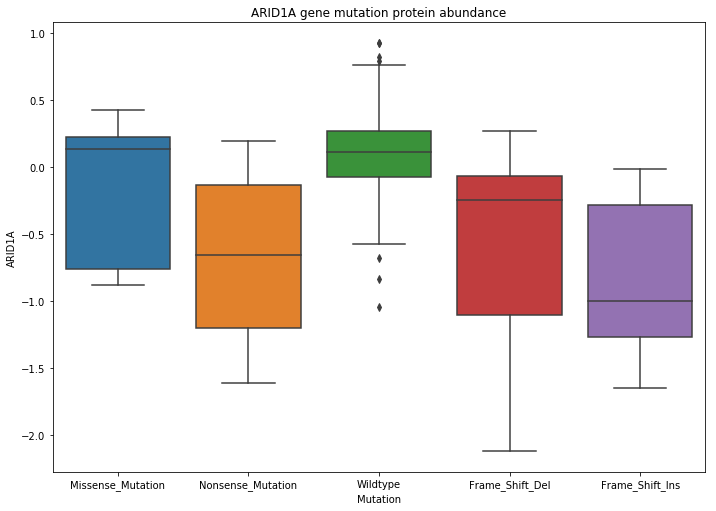

In [8]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
somatic_boxplot = sns.boxplot(data=cross, x="Mutation",y=gene, ax = ax)
somatic_boxplot.set_title("ARID1A gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="Mutation", y=gene,jitter=True, color=".3", order = [])
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.show()

### ARID1A phosphorylation levels and ARID1A Mutation

In [ ]:
#Specify the gene and a general pattern for the sites you want to capture
#In this case, we want all the sites that begin with 'TP53'
gene = 'ARID1A'
sites = phos.filter(regex='ARID1A-')
sigResults = [];

#Create two dataframes: mutated and non-mutated with the sites specified
genedf = somatic_mutations[gene].to_frame()
cross = genedf.add(sites, fill_value=0)
mutated = cross.loc[cross[gene] == 1.0]
wt = cross.loc[cross[gene] == 0.0]

#Bonferroni correction for multiple tests (we are testing multiple sites)
pcutoff = 0.05/len(cross.columns)

#Loop through all of the sites found and print out the ones with significant p-values
for loc in cross.columns:
    if not loc == gene:
        mutsitedf = mutated[[gene, loc]].dropna()
        wtsitedf = wt[[gene, loc]].dropna()
        ttest = scipy.stats.ttest_ind(mutsitedf[loc], wtsitedf[loc])
        if ttest[1] <= pcutoff:
            sigResults.append(loc)
            print('Results for ' + loc + ': ')
            print(ttest)

### We see that this site is generally phosphorylated at higher levels when ARID1A is mutated

In [ ]:
#sigResults is a list with all of the significant sites from the previous calculation (in this case there is only 1).
#Specify the index of the site you wish to visualize with x

x = 0
somatic_boxplot = sns.boxplot(data=cross, x=gene ,y=sigResults[x])
somatic_boxplot.set_title(gene + " gene mutation and " + sigResults[x] + " phosphorylation levels")
somatic_boxplot = sns.stripplot(data=cross, x=gene, y=sigResults[x],jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Phosphoproteomics")